In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
style.use("fivethirtyeight")
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

In [2]:
data=pd.read_csv("bank.csv")
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
data.describe().transpose()

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


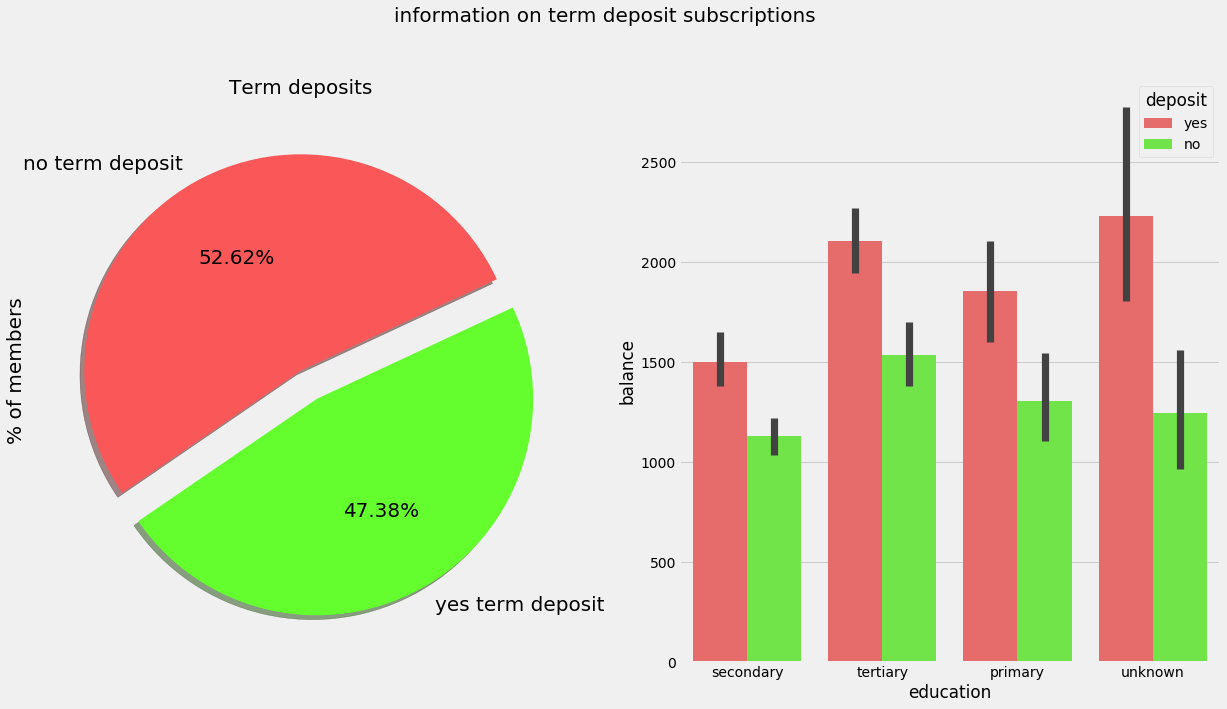

In [6]:
fig,ax=plt.subplots(1,2,figsize=(19,10))
colors=["#FA5858", "#64FE2E"]
labels=["no term deposit","yes term deposit"]
plt.suptitle("information on term deposit subscriptions",fontsize=20)
data["deposit"].value_counts().plot.pie(explode=[0,0.15],
                                         autopct='%1.2f%%',
                                         ax=ax[0],shadow=True,
                                         colors=colors,labels=labels,
                                         startangle=25,fontsize=20)
ax[0].set_ylabel("% of members",fontsize=20)
ax[0].set_title("Term deposits",fontsize=20)
pallete=["#FA5858", "#64FE2E"]
sns.barplot(x="education",y="balance",data=data,hue="deposit",palette=pallete)
plt.show()

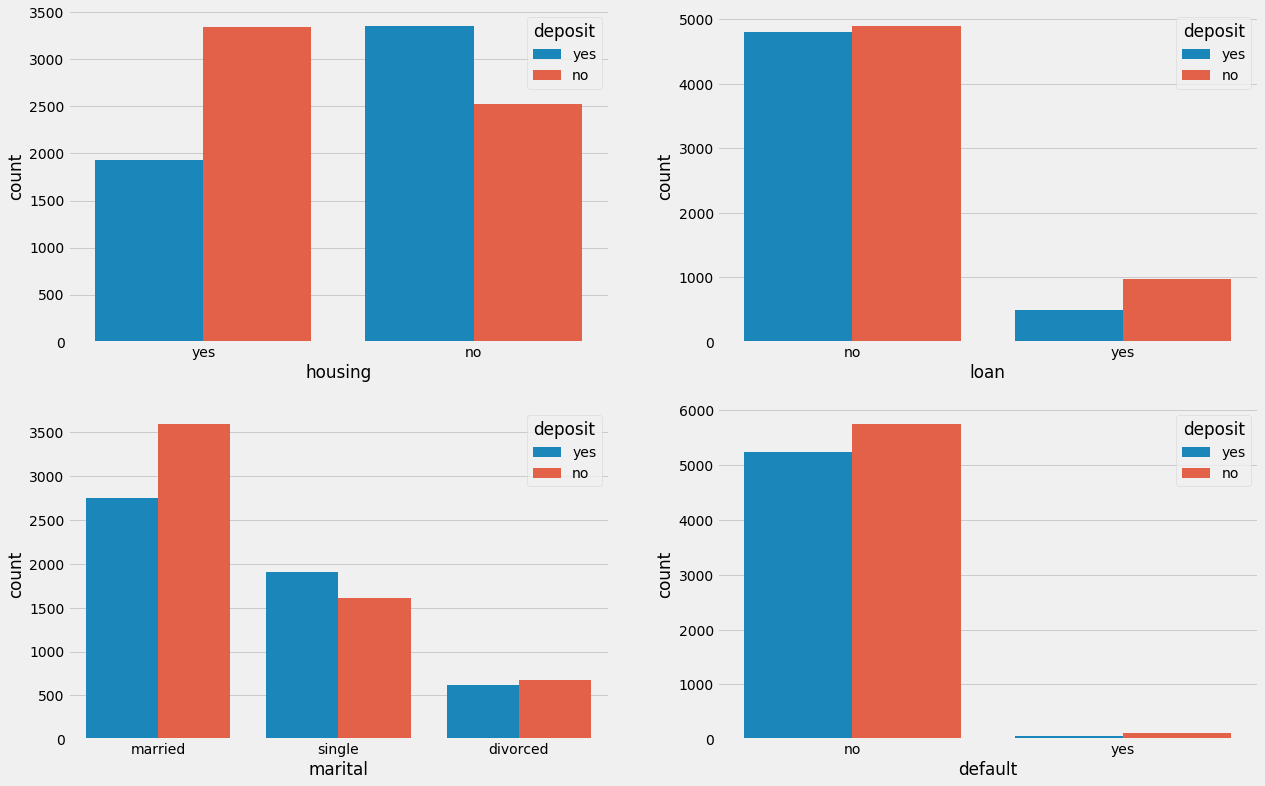

In [7]:
plt.figure(figsize=(19,12.5))
ax=plt.subplot(2,2,1)
sns.countplot(data["housing"],hue=data["deposit"])
ax=plt.subplot(2,2,2)
sns.countplot(data["loan"],hue=data["deposit"])
ax=plt.subplot(2,2,3)
sns.countplot(data["marital"],hue=data["deposit"])
ax=plt.subplot(2,2,4)
sns.countplot(data["default"],hue=data["deposit"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BDA63E8D0>,
      dtype=object)

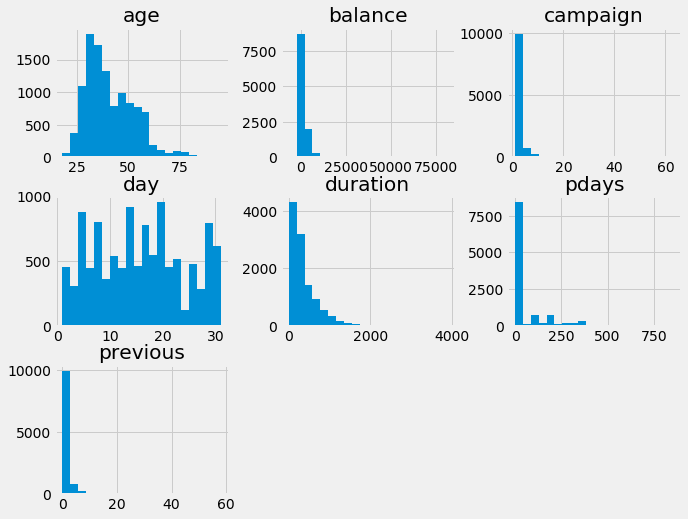

In [8]:
data.hist(bins=20,figsize=(10,8))

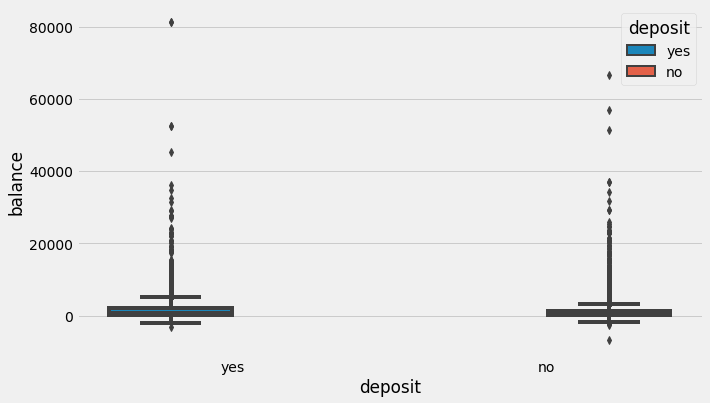

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="deposit",y="balance",data=data,hue="deposit")

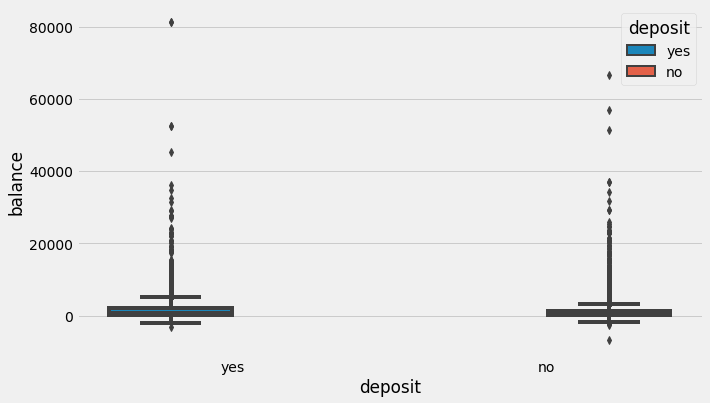

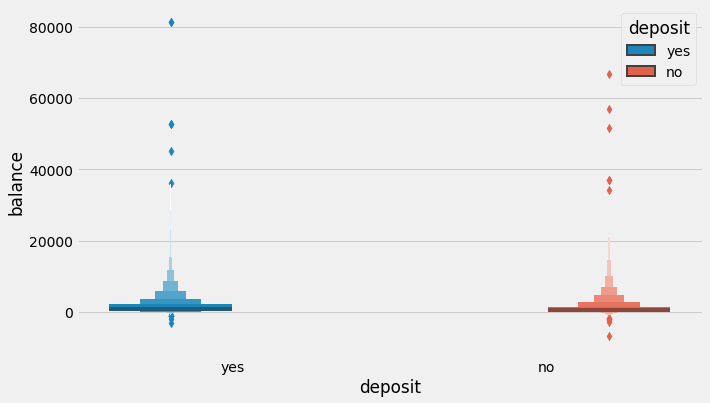

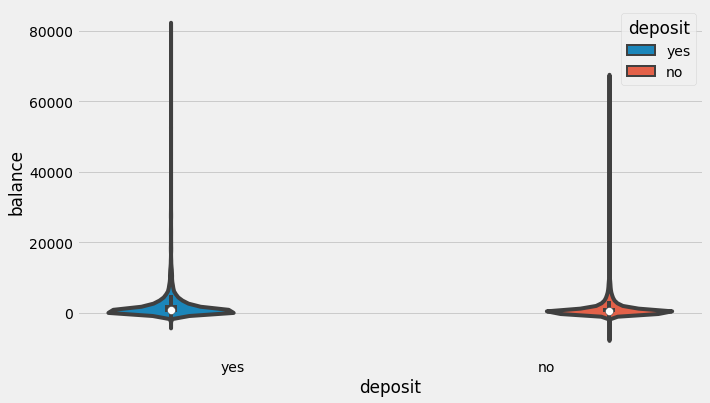

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="deposit",y="balance",data=data,hue="deposit")
plt.figure(figsize=(10,6))
sns.boxenplot(x="deposit",y="balance",data=data,hue="deposit")
plt.figure(figsize=(10,6))
sns.violinplot(x="deposit",y="balance",data=data,hue="deposit")

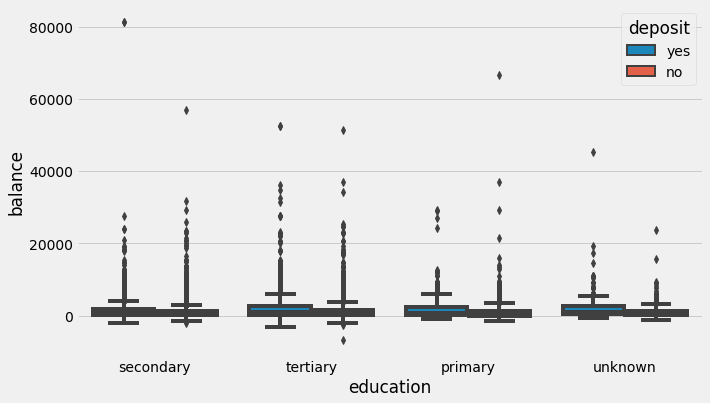

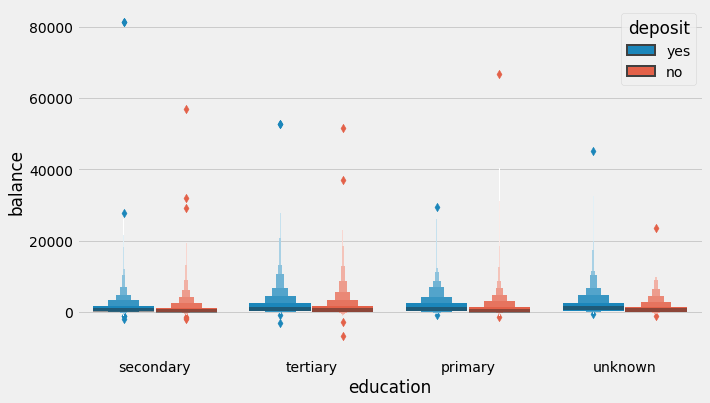

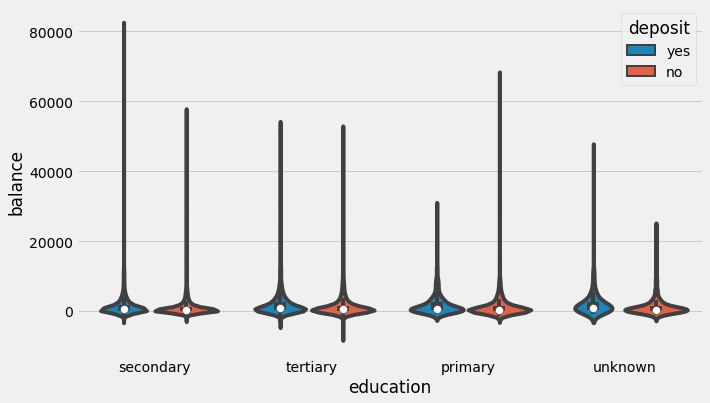

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="education",y="balance",data=data,hue="deposit")
plt.figure(figsize=(10,6))
sns.boxenplot(x="education",y="balance",data=data,hue="deposit")
plt.figure(figsize=(10,6))
sns.violinplot(x="education",y="balance",data=data,hue="deposit")

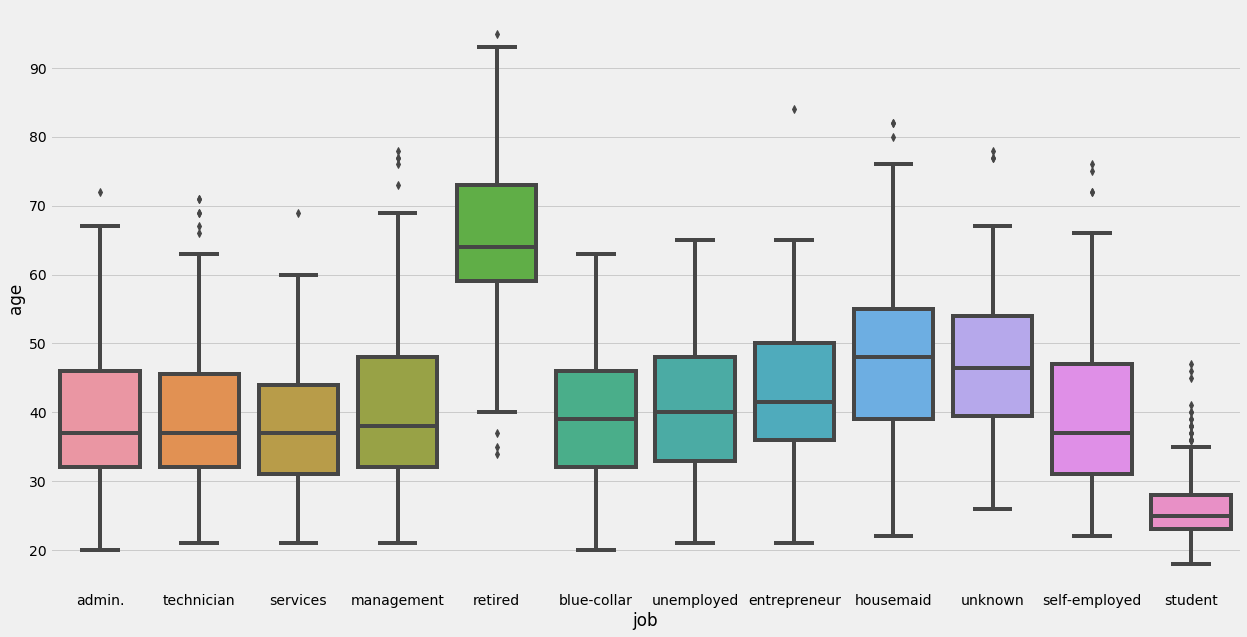

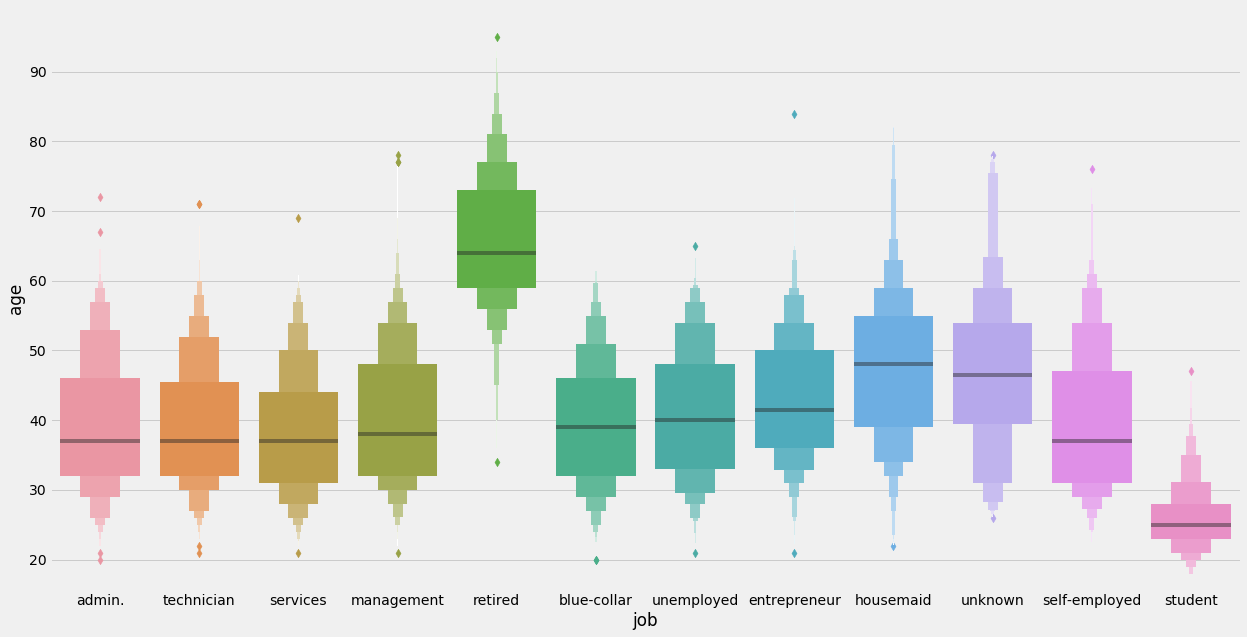

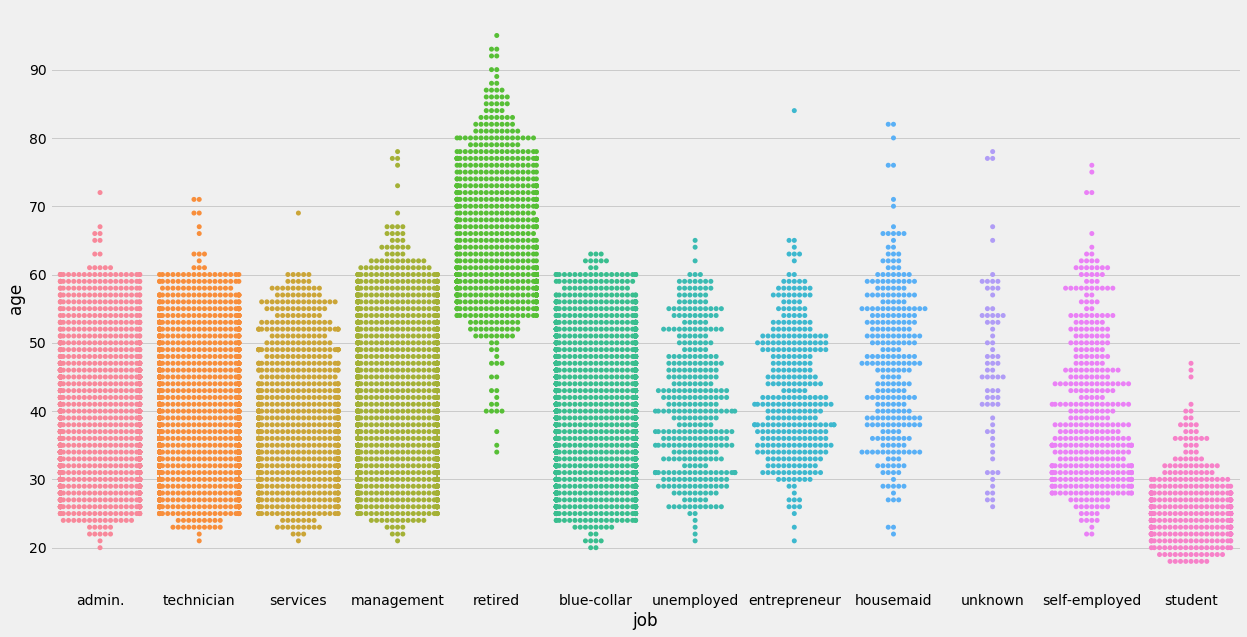

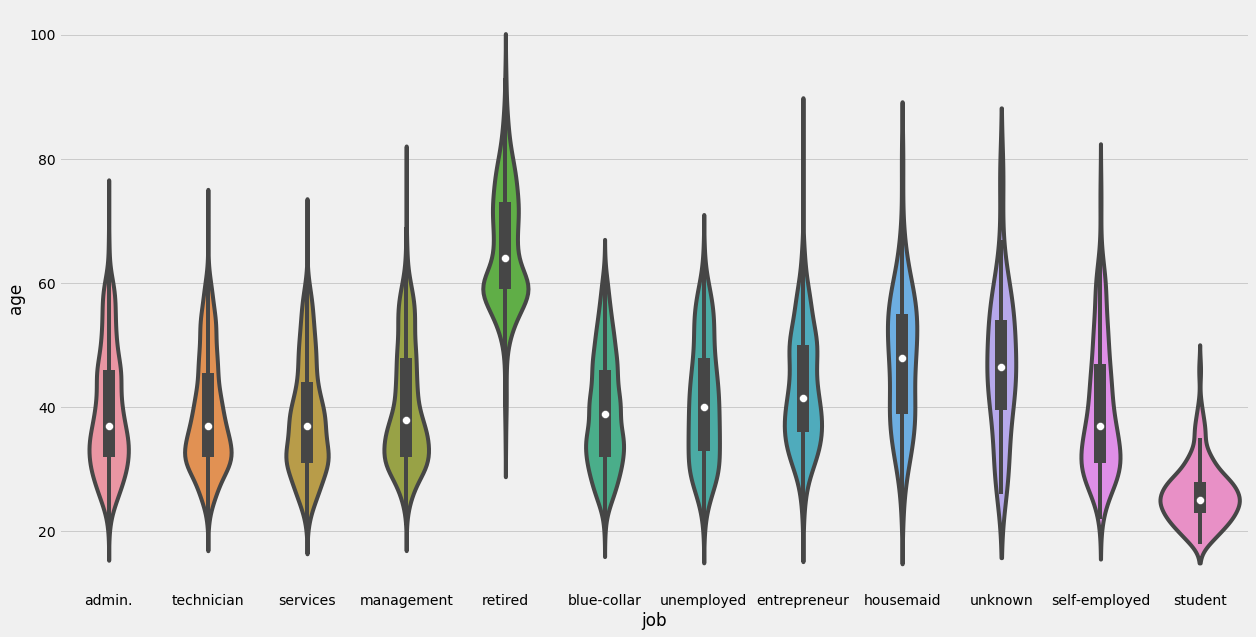

In [12]:
plt.figure(figsize=(19,10))
sns.boxplot(x="job",y="age",data=data)
plt.figure(figsize=(19,10))
sns.boxenplot(x="job",y="age",data=data)
plt.figure(figsize=(19,10))
sns.swarmplot(x="job",y="age",data=data)
plt.figure(figsize=(19,10))
sns.violinplot(x="job",y="age",data=data)

In [13]:
newdata1=data.drop(data.loc[data["job"]=="unknown"].index)
newdata1['job']=newdata1['job'].replace('admin.','management')

In [14]:
newdata1.head()

age         job  marital  education default  balance housing loan  contact  \
0   59  management  married  secondary      no     2343     yes   no  unknown   
1   56  management  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54  management  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [15]:
import squarify

newdata1=newdata1.drop(newdata1.loc[newdata1["balance"]==0].index)

x,y=0,0
width,height=120,100

job_names=newdata1["job"].value_counts().index
values=newdata1["job"].value_counts().tolist()

normed=squarify.normalize_sizes(values,width,height)
rects=squarify.squarify(normed,x,y,width,height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes=[]
annotations=[]
counter=0

for r in rects:
    shapes.append(
                   dict(
                       type="rect",
                       x0=r['x'],
                       y0=r['y'],
                       x1=r['x']+r['dx'],
                       y1=r['x']+r['dx'],
                       line=dict(width=2),
                       fillcolor=colors[counter]
                       )
                 )
    annotations.append(
                  dict(
                      x=r['x']+(r['dx']/2),
                      y=r['y']+(r['dx']/2),
                      text=values[counter],
                      showarrow=False
                      )
                      )
    counter=counter+1
    if counter>=len(colors):
        counter=0
trace0=go.Scatter(
    x=[r['x']+(r['dx']/2) for r in rects],
    y=[r['y']+(r['dy']/2) for r in rects],
    text=[str(v) for v in job_names],
    mode='text')

layout = dict(
    title='Number of Occupations',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest')

figure=dict(data=[trace0],layout=layout)

iplot(figure,filename='squarify-treemap')

In [16]:
subscribed_dep=newdata1.loc[newdata1["deposit"]=="yes"]
occupations=newdata1["job"].unique().tolist()

management=subscribed_dep["age"].loc[subscribed_dep["job"]=='management'].values
technician=subscribed_dep["age"].loc[subscribed_dep["job"]=='technician'].values
services=subscribed_dep["age"].loc[subscribed_dep["job"]=='services'].values
retired=subscribed_dep["age"].loc[subscribed_dep["job"]=='retired'].values
blue_collar=subscribed_dep["age"].loc[subscribed_dep["job"]=='blue_collar'].values
blue_collar=subscribed_dep["age"].loc[subscribed_dep["job"]=='blue_collar'].values
unemployed=subscribed_dep["age"].loc[subscribed_dep["job"]=='unemployed'].values
entrepreneur=subscribed_dep["age"].loc[subscribed_dep["job"]=='entrepreneur'].values
housemaid=subscribed_dep["age"].loc[subscribed_dep["job"]=='housemaid'].values
self_employed=subscribed_dep["age"].loc[subscribed_dep["job"]=='self_employed'].values
student=subscribed_dep["age"].loc[subscribed_dep["job"]=='student'].values

ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces=[]

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(size=2),
            line=dict(width=1)))
layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2),
        margin=dict(
                    l=40,
                    r=30,
                    b=80,
                    t=100),
        paper_bgcolor='rgb(224,255,246)',
        plot_bgcolor='rgb(251,251,251)',
        showlegend=False)
fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [17]:
fig=ff.create_facet_grid(
    data,
    x="duration",
    y="balance",
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)',
              'married': 'rgb(253, 174, 216)',
              'divorced': 'rgba(201, 109, 59, 0.82)'}
)
iplot(fig,filename='facet - custom colormap')

In [18]:
newdata1= newdata1.drop(newdata1.loc[newdata1["education"] == "unknown"].index)
newdata1['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [19]:
newdata1["marital/education"]=np.nan
lst=[newdata1]
for col in lst:
    col.loc[(col["marital"]=="single") & (newdata1["education"]=="primary"),'marital/education']='single/primary'
    col.loc[(col['marital'] == 'married') & (newdata1['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (newdata1['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (newdata1['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (newdata1['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (newdata1['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (newdata1['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (newdata1['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (newdata1['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'


newdata1.head()

age         job  marital  education default  balance housing loan  contact  \
0   59  management  married  secondary      no     2343     yes   no  unknown   
1   56  management  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54  management  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may      1042         1     -1         0  unknown     yes   
1    5   may      1467         1     -1         0  unknown     yes   
2    5   may      1389         1     -1         0  unknown     yes   
3    5   may       579         1     -1         0  unknown     yes   
4    5   may       673         2     -1         0  unknown     yes   

   marital/education  
0  married/secondary  
1  married/secondary  
2  married/secondary  
3  married/secondary  
4   married/tertiary

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

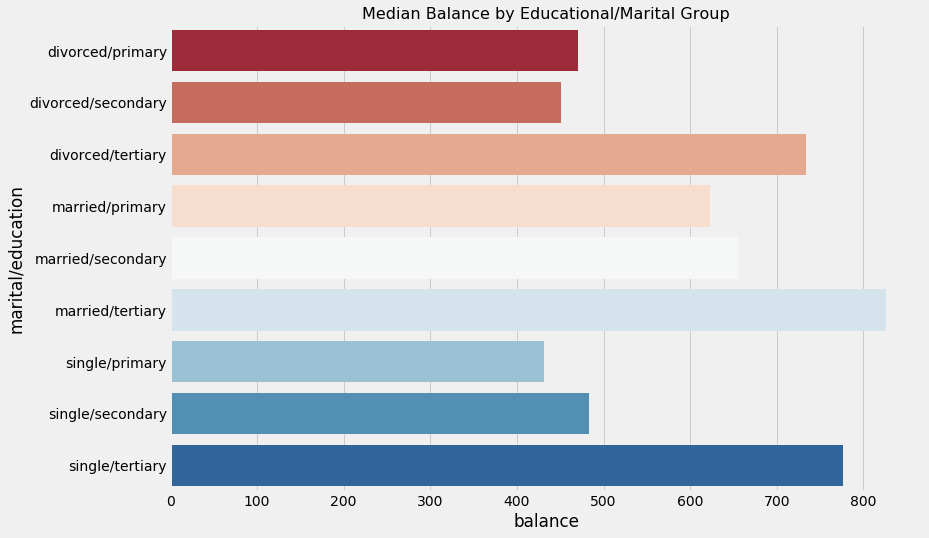

In [20]:
education_groups=newdata1.groupby(['marital/education'],as_index=False)['balance'].median()
fig = plt.figure(figsize=(12,8))
sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")
plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [22]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [23]:
data['job']=data['job'].replace('admin.','management')
#data.drop(["duration"],axis=1,inplace=True)

In [24]:
encoder=LabelEncoder()
data["job"]=encoder.fit_transform(data["job"])
data["marital"]=encoder.fit_transform(data["marital"])
data["education"]=encoder.fit_transform(data["education"])
data["default"]=encoder.fit_transform(data["default"])
data["housing"]=encoder.fit_transform(data["housing"])
data["loan"]=encoder.fit_transform(data["loan"])
data["contact"]=encoder.fit_transform(data["contact"])
data["month"]=encoder.fit_transform(data["month"])
data["poutcome"]=encoder.fit_transform(data["poutcome"])
data["deposit"]=encoder.fit_transform(data["deposit"])

In [25]:
x=data.drop(['deposit'],axis=1)
y=data["deposit"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import time

In [27]:
knn=KNeighborsClassifier()
lg=LogisticRegression()
dc=DecisionTreeClassifier()
rnf=RandomForestClassifier(n_estimators=500)
sv=SVC()
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,
                           algorithm="SAMME.R",learning_rate=0.5)
gbc=GradientBoostingClassifier()
xg=XGBClassifier()

In [28]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "adaboost":AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,
                           algorithm="SAMME.R",learning_rate=0.5),
    "xgboost":XGBClassifier(),
    "voting classifier":VotingClassifier(estimators=[('lr',lg),
                                        ('rf',rnf),('dt',dc),('kn',knn),
                                        ('svm',sv),("adaboost",ada),
                                        ("gbcb",gbc),("xgb",xg)],voting="hard")
}

In [29]:
no=len(dict_classifiers.keys())
def classifiers(X_train,Y_train,X_test,Y_test):
    results = pd.DataFrame(data=np.zeros(shape=(no,4)),
                              columns = ['classifier','train_score','validation score','training_time'])
    count=0  
    for key,classifier in dict_classifiers.items():
        start = time.clock()
        classifier.fit(X_train, Y_train)
        y_pred=classifier.predict(X_test)
        acc=accuracy_score(y_pred,Y_test)
        train_score =classifier.score(X_train, Y_train)
        end = time.clock()
        diff = end-start
        results.loc[count,'classifier']=key
        results.loc[count,'train_score']=train_score
        results.loc[count,'validation score']=acc
        results.loc[count,'training_time']=diff
        count=count+1
    return results

In [30]:
res=classifiers(x_train,y_train,x_test,y_test)

In [31]:
print(res.sort_values(by='validation score',ascending=False))

                     classifier  train_score  validation score  training_time
7                       xgboost     0.964281          0.858474       0.843528
5                 Random Forest     1.000000          0.850949      12.629554
3  Gradient Boosting Classifier     0.857126          0.846292       2.421955
8             voting classifier     0.907060          0.836259      34.705625
6                      adaboost     0.840282          0.831243       8.614229
4                 Decision Tree     1.000000          0.778216       0.113823
0           Logistic Regression     0.760363          0.759226       0.093744
1             Nearest Neighbors     0.819257          0.743103       0.566131
2                    Linear SVM     0.740891          0.739162       6.661867


In [32]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8584736653529201
[[1259  214]
 [ 181 1137]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1473
           1       0.84      0.86      0.85      1318

    accuracy                           0.86      2791
   macro avg       0.86      0.86      0.86      2791
weighted avg       0.86      0.86      0.86      2791



Text(0.5, 1, 'Confusion matrix')

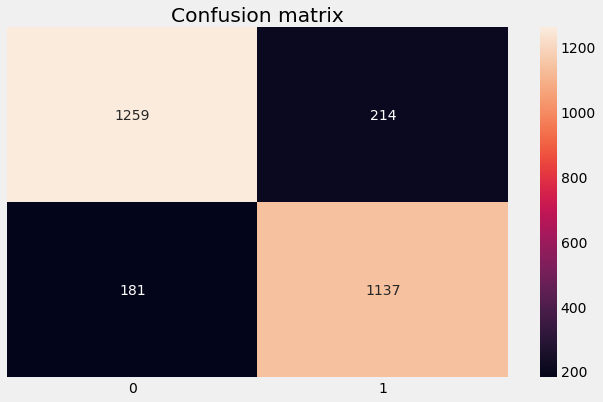

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,yticklabels=False,fmt="d")
plt.title("Confusion matrix")

In [34]:
#lets try in neural networks
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
def modelcreating(optimizer="adam",loss="binary_crossentropy"):
    model=Sequential()
    model.add(Dense(128,input_dim=16,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(4,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
model=modelcreating()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [37]:
earlystopping=EarlyStopping(monitor="val_loss",mode="min",patience=300)

In [38]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         epochs=500,batch_size=120,verbose=1,
         callbacks=[earlystopping])

Train on 8371 samples, validate on 2791 samples
Epoch 1/500
8371/8371 [==============================] - 1s 146us/sample - loss: 0.7391 - accuracy: 0.5084 - val_loss: 0.6908 - val_accuracy: 0.5278
Epoch 2/500
8371/8371 [==============================] - 0s 34us/sample - loss: 0.6884 - accuracy: 0.5256 - val_loss: 0.6826 - val_accuracy: 0.5278
Epoch 3/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.6676 - accuracy: 0.5256 - val_loss: 0.6584 - val_accuracy: 0.5278
Epoch 4/500
8371/8371 [==============================] - 0s 36us/sample - loss: 0.6527 - accuracy: 0.5255 - val_loss: 0.6605 - val_accuracy: 0.5650
Epoch 5/500
8371/8371 [==============================] - 0s 32us/sample - loss: 0.6437 - accuracy: 0.5845 - val_loss: 0.6614 - val_accuracy: 0.5421
Epoch 6/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.6549 - accuracy: 0.5612 - val_loss: 0.6601 - val_accuracy: 0.5654
Epoch 7/500
8371/8371 [==============================] - 0s 37u

Epoch 56/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4845 - accuracy: 0.7692 - val_loss: 0.4720 - val_accuracy: 0.7807
Epoch 57/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4647 - accuracy: 0.7832 - val_loss: 0.4673 - val_accuracy: 0.7839
Epoch 58/500
8371/8371 [==============================] - 0s 31us/sample - loss: 0.4633 - accuracy: 0.7819 - val_loss: 0.4816 - val_accuracy: 0.7875
Epoch 59/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.5114 - accuracy: 0.7567 - val_loss: 0.4928 - val_accuracy: 0.7714
Epoch 60/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.4710 - accuracy: 0.7789 - val_loss: 0.4941 - val_accuracy: 0.7707
Epoch 61/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4663 - accuracy: 0.7808 - val_loss: 0.4707 - val_accuracy: 0.7875
Epoch 62/500
8371/8371 [==============================] - 0s 28us/sample - loss: 0.4745 - accuracy: 0.7816

Epoch 111/500
8371/8371 [==============================] - 0s 39us/sample - loss: 0.4253 - accuracy: 0.8019 - val_loss: 0.4516 - val_accuracy: 0.7954
Epoch 112/500
8371/8371 [==============================] - 0s 40us/sample - loss: 0.4362 - accuracy: 0.7968 - val_loss: 0.4511 - val_accuracy: 0.7897
Epoch 113/500
8371/8371 [==============================] - 0s 31us/sample - loss: 0.4232 - accuracy: 0.8059 - val_loss: 0.4438 - val_accuracy: 0.7997
Epoch 114/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.4239 - accuracy: 0.8041 - val_loss: 0.4606 - val_accuracy: 0.7825
Epoch 115/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.4249 - accuracy: 0.8023 - val_loss: 0.4417 - val_accuracy: 0.8019
Epoch 116/500
8371/8371 [==============================] - 0s 32us/sample - loss: 0.4216 - accuracy: 0.8025 - val_loss: 0.4453 - val_accuracy: 0.7958
Epoch 117/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.4230 - accuracy:

8371/8371 [==============================] - 0s 30us/sample - loss: 0.4063 - accuracy: 0.8150 - val_loss: 0.4539 - val_accuracy: 0.7997
Epoch 166/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4067 - accuracy: 0.8156 - val_loss: 0.4521 - val_accuracy: 0.8069
Epoch 167/500
8371/8371 [==============================] - 0s 36us/sample - loss: 0.4039 - accuracy: 0.8167 - val_loss: 0.4494 - val_accuracy: 0.8040
Epoch 168/500
8371/8371 [==============================] - 0s 30us/sample - loss: 0.3991 - accuracy: 0.8185 - val_loss: 0.4461 - val_accuracy: 0.8094
Epoch 169/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4047 - accuracy: 0.8185 - val_loss: 0.4563 - val_accuracy: 0.8069
Epoch 170/500
8371/8371 [==============================] - 0s 36us/sample - loss: 0.3969 - accuracy: 0.8222 - val_loss: 0.4463 - val_accuracy: 0.8022
Epoch 171/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.4030 - accuracy: 0.8169 - val_

Epoch 220/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3787 - accuracy: 0.8294 - val_loss: 0.4750 - val_accuracy: 0.8065
Epoch 221/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3773 - accuracy: 0.8314 - val_loss: 0.4761 - val_accuracy: 0.8076
Epoch 222/500
8371/8371 [==============================] - 0s 31us/sample - loss: 0.3804 - accuracy: 0.8268 - val_loss: 0.4872 - val_accuracy: 0.8054
Epoch 223/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3763 - accuracy: 0.8292 - val_loss: 0.4920 - val_accuracy: 0.7986
Epoch 224/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3833 - accuracy: 0.8246 - val_loss: 0.4834 - val_accuracy: 0.8054
Epoch 225/500
8371/8371 [==============================] - 0s 28us/sample - loss: 0.3866 - accuracy: 0.8285 - val_loss: 0.4829 - val_accuracy: 0.8087
Epoch 226/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3863 - accuracy:

8371/8371 [==============================] - 0s 43us/sample - loss: 0.3605 - accuracy: 0.8361 - val_loss: 0.5358 - val_accuracy: 0.7857
Epoch 275/500
8371/8371 [==============================] - 0s 40us/sample - loss: 0.3559 - accuracy: 0.8400 - val_loss: 0.5378 - val_accuracy: 0.8037
Epoch 276/500
8371/8371 [==============================] - 0s 39us/sample - loss: 0.3598 - accuracy: 0.8404 - val_loss: 0.5329 - val_accuracy: 0.8040
Epoch 277/500
8371/8371 [==============================] - 0s 43us/sample - loss: 0.3663 - accuracy: 0.8403 - val_loss: 0.5190 - val_accuracy: 0.8026
Epoch 278/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3566 - accuracy: 0.8430 - val_loss: 0.5442 - val_accuracy: 0.8029
Epoch 279/500
8371/8371 [==============================] - 0s 36us/sample - loss: 0.3542 - accuracy: 0.8434 - val_loss: 0.5480 - val_accuracy: 0.7983
Epoch 280/500
8371/8371 [==============================] - 0s 41us/sample - loss: 0.3509 - accuracy: 0.8442 - val_

Epoch 329/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.3429 - accuracy: 0.8473 - val_loss: 0.6230 - val_accuracy: 0.7696
Epoch 330/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.3411 - accuracy: 0.8489 - val_loss: 0.6046 - val_accuracy: 0.7972
Epoch 331/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3432 - accuracy: 0.8482 - val_loss: 0.6233 - val_accuracy: 0.7897
Epoch 332/500
8371/8371 [==============================] - 0s 43us/sample - loss: 0.3439 - accuracy: 0.8464 - val_loss: 0.6147 - val_accuracy: 0.7850
Epoch 333/500
8371/8371 [==============================] - 0s 41us/sample - loss: 0.3423 - accuracy: 0.8497 - val_loss: 0.5932 - val_accuracy: 0.8022
Epoch 334/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.3356 - accuracy: 0.8516 - val_loss: 0.6189 - val_accuracy: 0.7936
Epoch 335/500
8371/8371 [==============================] - 0s 41us/sample - loss: 0.3334 - accuracy:

8371/8371 [==============================] - 0s 40us/sample - loss: 0.3232 - accuracy: 0.8572 - val_loss: 0.6542 - val_accuracy: 0.7890
Epoch 384/500
8371/8371 [==============================] - 0s 33us/sample - loss: 0.3212 - accuracy: 0.8580 - val_loss: 0.6759 - val_accuracy: 0.7890
Epoch 385/500
8371/8371 [==============================] - 0s 43us/sample - loss: 0.3214 - accuracy: 0.8594 - val_loss: 0.7039 - val_accuracy: 0.7911
Epoch 386/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.3223 - accuracy: 0.8594 - val_loss: 0.6902 - val_accuracy: 0.7925
Epoch 387/500
8371/8371 [==============================] - 0s 33us/sample - loss: 0.3147 - accuracy: 0.8619 - val_loss: 0.6624 - val_accuracy: 0.7854
Epoch 388/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.3121 - accuracy: 0.8647 - val_loss: 0.6680 - val_accuracy: 0.7843
Epoch 389/500
8371/8371 [==============================] - 0s 42us/sample - loss: 0.3180 - accuracy: 0.8641 - val_

Epoch 438/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3123 - accuracy: 0.8642 - val_loss: 0.6636 - val_accuracy: 0.7900
Epoch 439/500
8371/8371 [==============================] - 0s 30us/sample - loss: 0.3073 - accuracy: 0.8661 - val_loss: 0.7026 - val_accuracy: 0.7893
Epoch 440/500
8371/8371 [==============================] - 0s 37us/sample - loss: 0.3111 - accuracy: 0.8667 - val_loss: 0.7363 - val_accuracy: 0.7968
Epoch 441/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.3206 - accuracy: 0.8614 - val_loss: 0.6679 - val_accuracy: 0.7922
Epoch 442/500
8371/8371 [==============================] - 0s 38us/sample - loss: 0.3042 - accuracy: 0.8693 - val_loss: 0.7378 - val_accuracy: 0.7911
Epoch 443/500
8371/8371 [==============================] - 0s 31us/sample - loss: 0.3080 - accuracy: 0.8674 - val_loss: 0.7014 - val_accuracy: 0.7857


In [39]:
loss=pd.DataFrame(model.history.history)
loss.tail()

loss  accuracy  val_loss  val_accuracy
438  0.307252  0.866085  0.702607      0.789323
439  0.311128  0.866683  0.736303      0.796847
440  0.320644  0.861426  0.667938      0.792189
441  0.304182  0.869311  0.737764      0.791114
442  0.307972  0.867399  0.701353      0.785740

<Figure size 720x432 with 0 Axes>

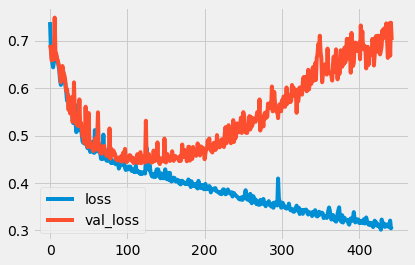

In [40]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

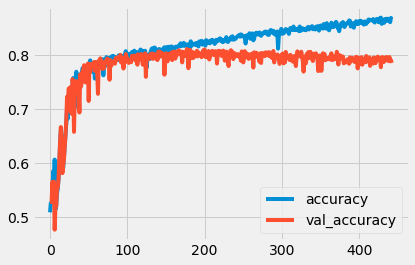

In [41]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [42]:
y_pred=model.predict_classes(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7857398781798638
[[1209  264]
 [ 334  984]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1473
           1       0.79      0.75      0.77      1318

    accuracy                           0.79      2791
   macro avg       0.79      0.78      0.78      2791
weighted avg       0.79      0.79      0.79      2791

